# Deep Learning - Lab 2
### Zaidan Mufaddhal - AIU20092029

# SECTION ONE:

### Importing dataset (House Price)

In [4]:
#import library
import pandas as pd

In [5]:
#import dataset
df = pd.read_csv('Downloads\housepricedata.csv')

In [6]:
#Print dataset
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450.0,7.0,5.0,856.0,2.0,1.0,3.0,8.0,0.0,548.0,1
1,9600.0,6.0,8.0,1262.0,2.0,0.0,3.0,6.0,1.0,460.0,1
2,11250.0,7.0,5.0,920.0,2.0,1.0,3.0,6.0,1.0,608.0,1
3,9550.0,7.0,5.0,756.0,1.0,0.0,3.0,7.0,1.0,642.0,0
4,14260.0,8.0,5.0,1145.0,2.0,1.0,4.0,9.0,1.0,836.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917.0,6.0,5.0,953.0,2.0,1.0,3.0,7.0,1.0,460.0,1
1456,13175.0,6.0,6.0,1542.0,2.0,0.0,3.0,7.0,2.0,500.0,1
1457,9042.0,7.0,9.0,1152.0,2.0,0.0,4.0,9.0,2.0,252.0,1
1458,9717.0,5.0,6.0,1078.0,1.0,0.0,2.0,5.0,0.0,240.0,0


In [7]:
#convert the column into arrays
dataset = df.values

In [8]:
dataset

array([[8.450e+03, 7.000e+00, 5.000e+00, ..., 0.000e+00, 5.480e+02,
        1.000e+00],
       [9.600e+03, 6.000e+00, 8.000e+00, ..., 1.000e+00, 4.600e+02,
        1.000e+00],
       [1.125e+04, 7.000e+00, 5.000e+00, ..., 1.000e+00, 6.080e+02,
        1.000e+00],
       ...,
       [9.042e+03, 7.000e+00, 9.000e+00, ..., 2.000e+00, 2.520e+02,
        1.000e+00],
       [9.717e+03, 5.000e+00, 6.000e+00, ..., 0.000e+00, 2.400e+02,
        0.000e+00],
       [9.937e+03, 5.000e+00, 6.000e+00, ..., 0.000e+00, 2.760e+02,
        0.000e+00]])

### Converting our dataframe into an array

In [9]:
X = dataset[:,0:10]

In [10]:
Y = dataset[:,10]

In [11]:
#import the package from scikit-learn
from sklearn import preprocessing

In [12]:
#feature scalling
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [13]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size = 0.3)

In [16]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size = 0.5)

In [17]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


### Building and trianing our first neural network

In [18]:
#pip install keras

In [19]:
#import library
import keras
from keras.models import Sequential
from keras.layers import Dense

In [20]:
model = Sequential([Dense(32, activation='relu', input_shape=(10,)),
                   Dense(32, activation='relu'),
                   Dense(1, activation='sigmoid')])

### Filling the best numbers

In [21]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
hist = model.fit(X_train,Y_train,batch_size=32,epochs=100,validation_data=(X_val,Y_val))

Epoch 1/100
32/32 [==============================] - 1s 15ms/step - loss: 0.6809 - accuracy: 0.5020 - val_loss: 0.6768 - val_accuracy: 0.4932
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6721 - accuracy: 0.5039 - val_loss: 0.6685 - val_accuracy: 0.4932
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6654 - accuracy: 0.5068 - val_loss: 0.6617 - val_accuracy: 0.5023
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6600 - accuracy: 0.5166 - val_loss: 0.6562 - val_accuracy: 0.5205
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6553 - accuracy: 0.5313 - val_loss: 0.6513 - val_accuracy: 0.5662
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6510 - accuracy: 0.6115 - val_loss: 0.6466 - val_accuracy: 0.6210
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6468 - accuracy: 0.6438 - val_loss: 0.6418 - val_accuracy: 0.6849
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3443 - accuracy: 0.8796 - val_loss: 0.2972 - val_accuracy: 0.9178
Epoch 60/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3417 - accuracy: 0.8796 - val_loss: 0.2949 - val_accuracy: 0.9132
Epoch 61/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3391 - accuracy: 0.8806 - val_loss: 0.2933 - val_accuracy: 0.9132
Epoch 62/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3367 - accuracy: 0.8757 - val_loss: 0.2902 - val_accuracy: 0.9132
Epoch 63/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3343 - accuracy: 0.8777 - val_loss: 0.2868 - val_accuracy: 0.9132
Epoch 64/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3325 - accuracy: 0.8767 - val_loss: 0.2844 - val_accuracy: 0.9087
Epoch 65/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3303 - accuracy: 0.8796 - val_loss: 0.2826 - val_accuracy: 0.9087
Epoch 

In [23]:
#evaluting on the test set
model.evaluate(X_test,Y_test)[1]

7/7 [==============================] - 0s 3ms/step - loss: 0.3147 - accuracy: 0.8813


0.8812785148620605

### Visualizing loss and accuracy

In [24]:
import matplotlib.pyplot as plt

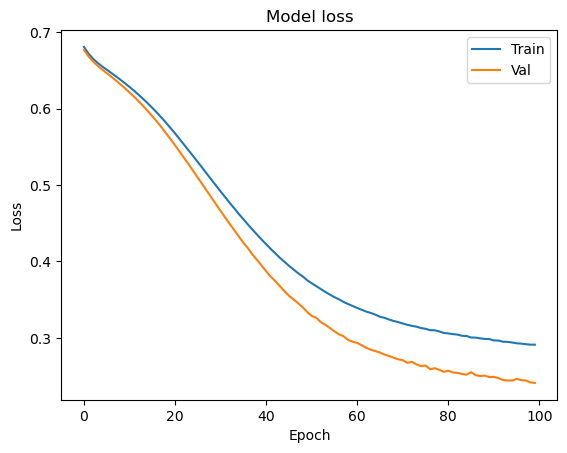

In [25]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

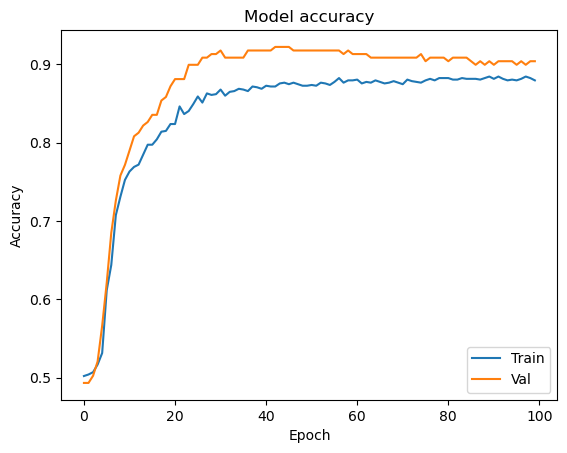

In [26]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='lower right')
plt.show()

# SECTION TWO:
#### Adding Regularization to our Neural Network

In [27]:
model_2 = Sequential([Dense(1000, activation='relu', input_shape=(10,)),
                    Dense(1000, activation='relu'),
                    Dense(1000, activation='relu'),
                    Dense(1000, activation='relu'),
                    Dense(1, activation='sigmoid'),])

In [28]:
model_2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
hist_2 = model_2.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val,Y_val))

Epoch 1/100
32/32 [==============================] - 3s 49ms/step - loss: 0.4506 - accuracy: 0.7847 - val_loss: 0.3135 - val_accuracy: 0.8813
Epoch 2/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3933 - accuracy: 0.8346 - val_loss: 0.3354 - val_accuracy: 0.8584
Epoch 3/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3432 - accuracy: 0.8601 - val_loss: 0.2690 - val_accuracy: 0.8813
Epoch 4/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2907 - accuracy: 0.8875 - val_loss: 0.2287 - val_accuracy: 0.9041
Epoch 5/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2908 - accuracy: 0.8806 - val_loss: 0.2480 - val_accuracy: 0.9087
Epoch 6/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2703 - accuracy: 0.8943 - val_loss: 0.2363 - val_accuracy: 0.8904
Epoch 7/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2585 - accuracy: 0.8894 - val_loss: 0.2484 - val_accuracy: 0.8858
Epoch 

#### Loss curves for over-fitting model

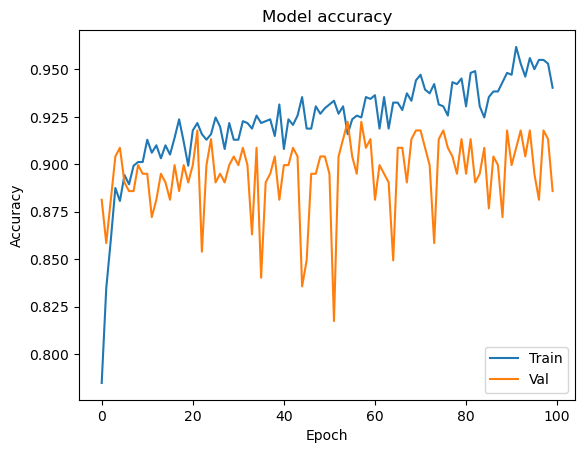

In [30]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='lower right')
plt.show()

#### Training and validation accuracy for our overfitting model

In [31]:
from keras.layers import Dropout
from keras import regularizers

In [65]:
model_3 = Sequential([Dense(1000, activation='relu',
                           kernel_regularizer=regularizers.l2(0.01),
                           input_shape=(10,)),
                     Dropout(0.3,),
                     Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
                     Dropout(0.3),
                     Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
                     Dropout(0.3),
                     Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
                     Dropout(0.3),
                     Dense(1000, activation='relu',
                                        kernel_regularizer=regularizers.l2(0.01)),])

In [66]:
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [67]:
hist_3 = model_3.fit(X_train, Y_train, batch_size=32, epochs=33, validation_data=(X_val, Y_val))

Epoch 1/33
32/32 [==============================] - 3s 65ms/step - loss: 27.2689 - accuracy: 0.0000e+00 - val_loss: 15.9591 - val_accuracy: 0.0000e+00
Epoch 2/33
32/32 [==============================] - 2s 52ms/step - loss: 11.6713 - accuracy: 0.0000e+00 - val_loss: 8.5999 - val_accuracy: 0.0000e+00
Epoch 3/33
32/32 [==============================] - 2s 52ms/step - loss: 7.1891 - accuracy: 0.0000e+00 - val_loss: 5.9075 - val_accuracy: 0.0000e+00
Epoch 4/33
32/32 [==============================] - 2s 60ms/step - loss: 5.1490 - accuracy: 0.0000e+00 - val_loss: 4.3663 - val_accuracy: 0.0000e+00
Epoch 5/33
32/32 [==============================] - 2s 59ms/step - loss: 3.9544 - accuracy: 0.0000e+00 - val_loss: 3.4339 - val_accuracy: 0.0000e+00
Epoch 6/33
32/32 [==============================] - 2s 59ms/step - loss: 3.1774 - accuracy: 0.0000e+00 - val_loss: 2.8141 - val_accuracy: 0.0000e+00
Epoch 7/33
32/32 [==============================] - 2s 60ms/step - loss: 2.6458 - accuracy: 0.0000e+00 

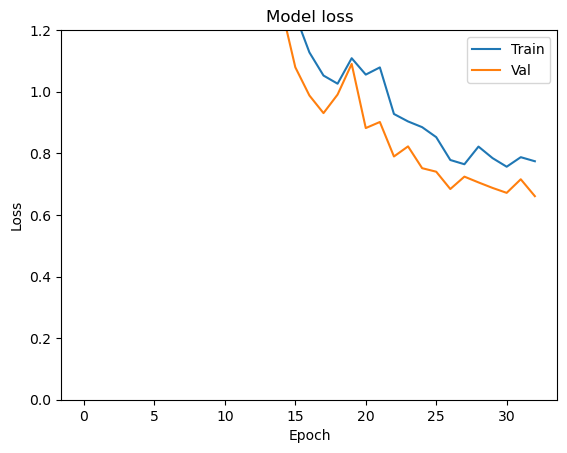

In [70]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

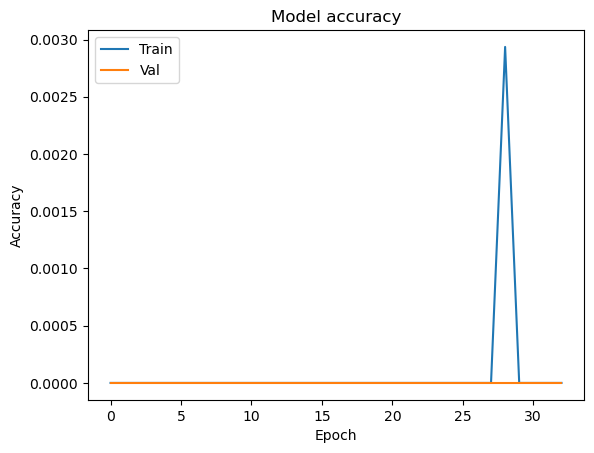

In [71]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper left')
plt.show()